In [1]:
import numpy as np
import pickle
from operator import itemgetter
import numpy as np
from matplotlib.pyplot import *

In [2]:
user_idd_list = pickle.load(open('./user_idd_list.pkl'))
item_idd_list = pickle.load(open('./item_idd_list.pkl'))
key_genre = pickle.load(open('./key_genre.pkl'))
item_idd_genre_list = pickle.load(open('./item_idd_genre_list.pkl'))
item_idd_list = pickle.load(open('./item_idd_list.pkl'))
item_genre_dict = pickle.load(open('./item_genre_dict.pkl'))
item_id_dict = pickle.load(open('./item_id_dict.pkl'))
key_genre_rating_count = pickle.load(open('./key_genre_rating_count.pkl'))
rdf = pickle.load(open('./training_df.pkl'))
user_id_dict = pickle.load(open('./user_id_dict.pkl'))
key_genre_rating = pickle.load(open('./key_genre_rating.pkl'))


mean:
Grocery:3.979548274100562
Toy:4.106315188313445
VideoGame:4.12911728195623
Pet:4.139137817187057
Beauty:4.149376628209899
Tool:4.31278564262624
Office:4.329136171032357

std:
Office:0.8838477854714122
Tool:0.9186825614616745
Toy:0.974978728775495
Beauty:1.0104439649341135
Grocery:1.0676770131773898
Pet:1.1025936834717995
VideoGame:1.1393064361753191

std of rating mean: 0.11263399712083313
std of each rating level: [0.01234199 0.01251788 0.02579144 0.03480738 0.05286626]
sum of std list: 0.13832494764628073


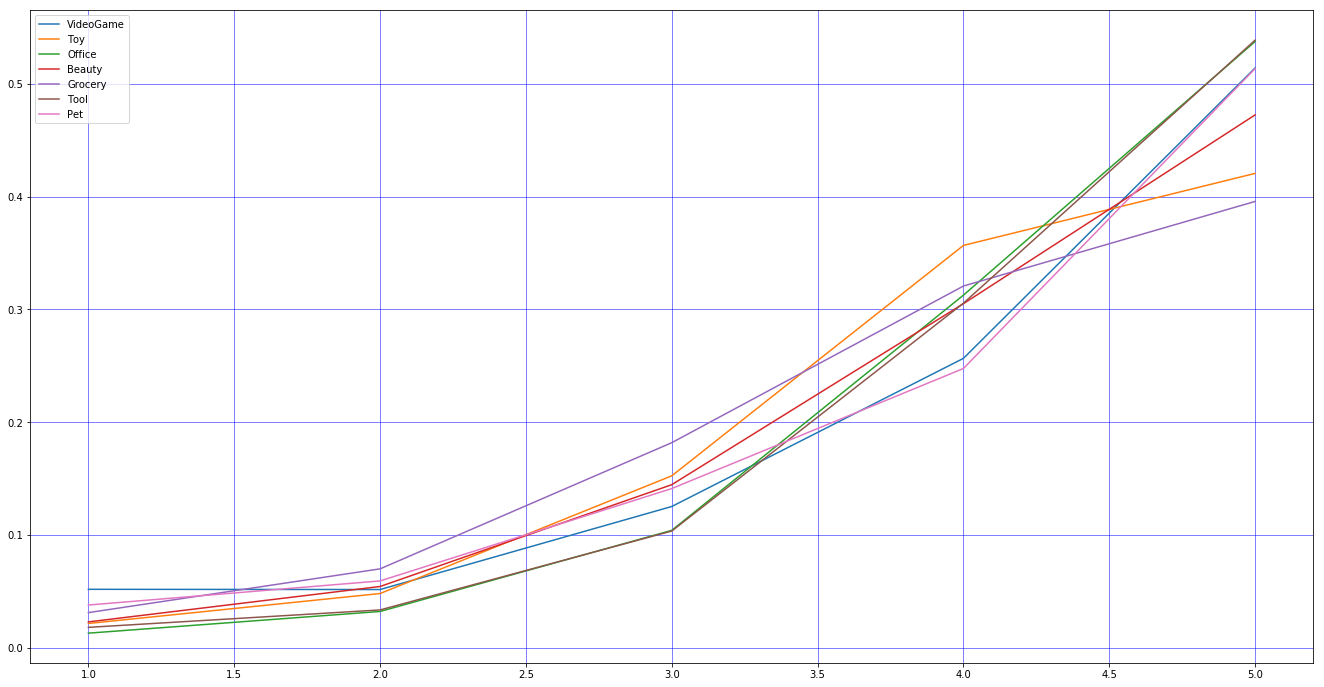

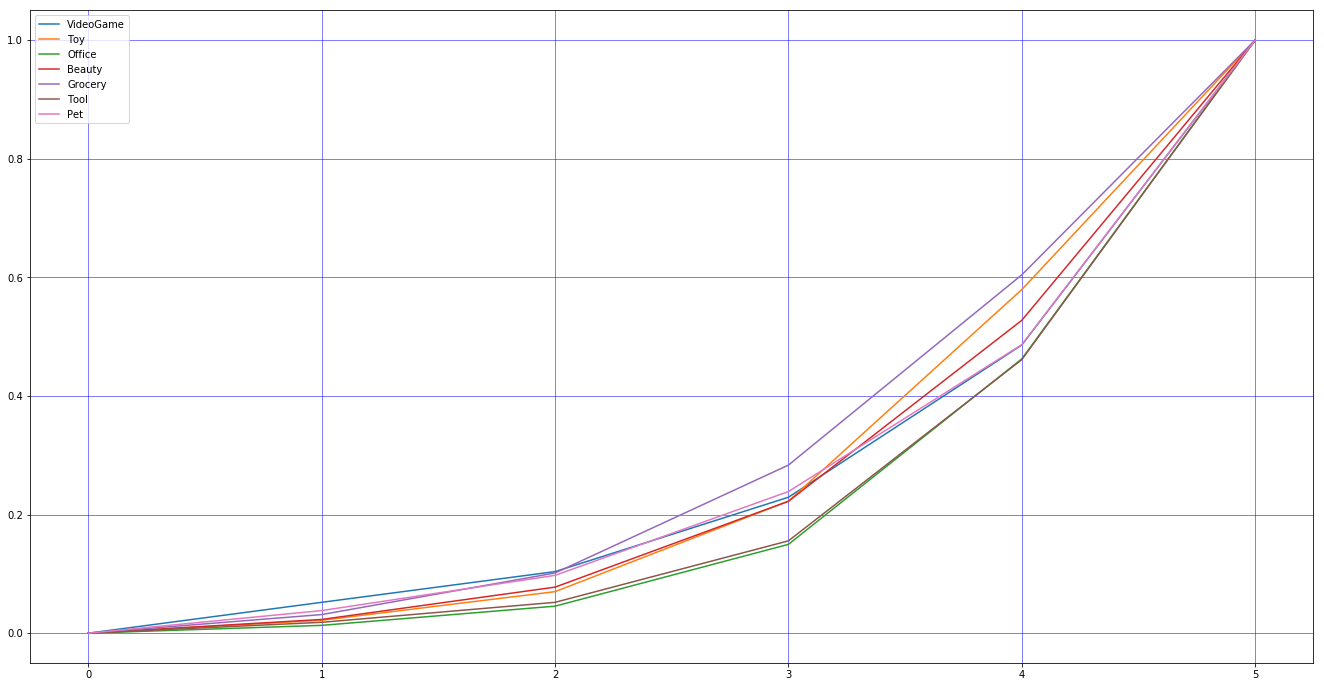

In [3]:
# calculate the weighted average of rating for each genre, and plot rating distribution
from dit.divergences import jensen_shannon_divergence

mean_list = list()
std_list = list()
rating_array = np.array([])
for k in key_genre:
    rl = key_genre_rating_count[k]
    rl = (rl * 1.0) / np.sum(rl)
    rating_array = np.append(rating_array, rl)
    mean = np.mean(key_genre_rating[k])
    std = np.std(key_genre_rating[k])
    mean_list.append([k, mean])
    std_list.append([k, std])
    plot(np.array(range(1, 6)), rl)
legend(key_genre)
gcf().set_size_inches(23,12)
grid(color='b', linestyle='-', linewidth=0.5)
rating_array = rating_array.reshape((len(key_genre), 5))

print('')
print('=' * 100)
print('mean:')
mean_list = sorted(mean_list, key=itemgetter(1))
for mean_pair in mean_list:
    print(mean_pair[0] + ':' + str(mean_pair[1]))
print('')
print('std:')
std_list = sorted(std_list, key=itemgetter(1))
for std_pair in std_list:
    print(std_pair[0] + ':' + str(std_pair[1]))
print('')
print('std of rating mean: ' + str(np.std([i[1] for i in mean_list])))

std_list = np.std(rating_array, axis=0)
print('std of each rating level: ' + str(std_list))
print('sum of std list: ' + str(np.sum(std_list)))

# calculate and plot the CDF of each genre
figure()
cdf_array = np.array([])
for k in key_genre:
    rl = np.zeros(1 + len(key_genre_rating_count[k]))
    rl[1:] = key_genre_rating_count[k]
    rl = (rl * 1.0) / np.sum(rl)
    csum = np.cumsum(rl)
    cdf_array = np.append(cdf_array, csum)
    plot(np.array(range(0, 6)), csum)
legend(key_genre)
gcf().set_size_inches(23,12)
grid(color='b', linestyle='-', linewidth=0.5)

In [4]:
from scipy.stats import entropy
def JS(distributions):
    num = distributions.shape[0]
    mean = np.mean(distributions, axis=0)
    js = 0.0
    for i in range(num):
        p = distributions[i, :]
        p /= p.sum()
        js += entropy(p, mean)
    js /= num
    return js

In [5]:
from scipy.stats import entropy
print('Average Divergence')
KL_list = list()
num_genre = len(key_genre)
for i in range(num_genre):
    for j in range(num_genre):
        if i == j:
            continue
        KL = entropy(rating_array[i, :], rating_array[j, :])
        KL_list.append(KL)
np.mean(KL_list)

Average Divergence


0.02737975278468448

In [6]:
print('Jensen-Shannon Divergence')
JS(rating_array)

Jensen-Shannon Divergence


0.011608840162538447

In [7]:
import scipy.io

scipy.io.savemat('./amazon-analysis.mat', dict(pdf=rating_array, cdf=cdf_array))

In [8]:
genre_mean_dict = dict()
for k in key_genre:
    genre_mean_dict[k] = 0.0
for mean_pair in mean_list:
    genre_mean_dict[mean_pair[0]] = mean_pair[1]
with open("genre_mean_dict.pkl", "wb") as f:
    pickle.dump(genre_mean_dict, f, pickle.HIGHEST_PROTOCOL)